# Predicting Music Genres
## Team Members

- Ayça Öter
- Sena Seyhan

In [46]:
import warnings
warnings.filterwarnings("ignore")

import sklearn
sklearn.set_config(transform_output="pandas")

## Introduction
### About the Dataset:
The dataset used in this study is the Spotify Tracks Dataset, sourced from the Hugging Face Datasets repository. This dataset contains detailed information on Spotify tracks, including audio features, metadata, and track popularity, covering a diverse range of 125 music genres. It is designed to support machine learning applications in music analysis, recommendation systems, and audio feature-based classifications.
### Content:
The dataset consists of approximately 114,000 rows and 20 variables:

1. **track_id**: A unique identifier for each track.
2. **artists**: Names of the artists performing the track, multiple artists are separated by a semicolon (";").
3. **album_name**: The name of the album the track belongs to.
4. **track_name**: The name of the track.
5. **popularity**: Popularity of the track, ranging from 0 (least popular) to 100 (most popular).
6. **duration_ms**: Duration of the track in milliseconds.
7. **explicit**: Indicates whether the track contains explicit content (true or false).
8. **danceability**: A measure of how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. It ranges from 0.0 (least danceable) to 1.0 (most danceable).
9. **energy**: Energy level of the track, ranging from 0.0 (low energy) to 1.0 (high energy). For example, death metal has high energy, while a Bach prelude scores low on the scale.
10. **key**: The key of the track, represented as an integer (e.g., 0 = C, 1 = C♯/D♭, 2 = D, etc.).
11. **loudness**: The overall loudness of the track, measured in decibels (dB).
12. **mode**: The modality of the track, where 1 represents major and 0 represents minor.
13. **speechiness**: A measure of the presence of spoken words in the track, ranging from 0.0 to 1.0. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
14. **acousticness**: A confidence measure of whether the track is acoustic, ranging from 0.0 to 1.0.
15. **instrumentalness**: Predicts the likelihood that a track contains no vocals, ranging from 0.0 to 1.0. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
16. **liveness**: Indicates the presence of an audience in the recording, ranging from 0.0 to 1.0.
17. **valence**: A measure of the musical positiveness of the track, ranging from 0.0 (negative) to 1.0 (positive). Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
18. **tempo**: The speed of the track, measured in beats per minute (BPM).
19. **time_signature**: The overall time signature of the track. The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
20. **track_genre**: The genre of the track.


In [47]:
import pandas as pd
import numpy as np

spotify_data = pd.read_csv('spotify_data.csv', index_col=0)
spotify_data.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.68,0.46,1,-6.75,0,0.14,0.03,0.00,0.36,0.71,87.92,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,0.17,1,-17.23,1,0.08,0.92,0.00,0.10,0.27,77.49,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.44,0.36,0,-9.73,1,0.06,0.21,0.00,0.12,0.12,76.33,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.27,0.06,0,-18.52,1,0.04,0.91,0.00,0.13,0.14,181.74,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.62,0.44,2,-9.68,1,0.05,0.47,0.00,0.08,0.17,119.95,4,acoustic


In [48]:
# Non-null counts and types of each column
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           114000 

In [49]:
# The summary of each column
spotify_data.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,114000.00,33.24,22.31,0.00,17.00,35.00,50.00,100.00
duration_ms,114000.00,228029.15,107297.71,0.00,174066.00,212906.00,261506.00,5237295.00
danceability,114000.00,0.57,0.17,0.00,0.46,0.58,0.69,0.98
energy,114000.00,0.64,0.25,0.00,0.47,0.69,0.85,1.00
key,114000.00,5.31,3.56,0.00,2.00,5.00,8.00,11.00
loudness,114000.00,-8.26,5.03,-49.53,-10.01,-7.00,-5.00,4.53
mode,114000.00,0.64,0.48,0.00,0.00,1.00,1.00,1.00
speechiness,114000.00,0.08,0.11,0.00,0.04,0.05,0.08,0.96
acousticness,114000.00,0.31,0.33,0.00,0.02,0.17,0.60,1.00
instrumentalness,114000.00,0.16,0.31,0.00,0.00,0.00,0.05,1.00


In [50]:
spotify_data.shape

(114000, 20)

# Description of the Problem
In this project, we aim to classify the genre of a music track based on its audio features and metadata. Leveraging a dataset containing detailed characteristics of songs, such as tempo, danceability, energy, and acousticness, we will build a predictive model to categorize tracks into their respective genres.

This task is a classic example of a multi-class classification problem, where:

- Each music track is represented by a set of numerical and categorical attributes derived from its audio analysis.
- The dependent variable, `track_genre`, represents the genre of the track, which is the target to be predicted.

The ultimate goal is to develop a machine learning model capable of accurately classifying songs into one of the many music genres in the dataset. This problem is significant for applications in:

- Music recommendation systems,
- Playlist generation,
- Audio content analysis.


## Data Exploration

In [51]:
null_counts = spotify_data.isnull().sum().sort_values(ascending = False)
null_percent = (spotify_data.isnull().sum()/spotify_data.isnull().count()*100).sort_values(ascending = False)
pd.concat([null_counts, null_percent], axis=1, keys=['Total Null Count', 'Percentage of Nulls']).transpose()

,album_name,track_name,artists,track_id,speechiness,time_signature,tempo,valence,liveness,instrumentalness,acousticness,loudness,mode,key,energy,danceability,explicit,duration_ms,popularity,track_genre
Total Null Count,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Percentage of Nulls,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


- As can be seen from the table above, there are minimal missing values in the dataset, with only one null value in each of the columns `album_name`, `track_name`, and `artists`. Since these missing values are very few and limited to three columns, they will be dropped from the dataset to maintain the overall quality of the data. Therefore, additional steps for missing value imputation are not necessary.

In [52]:
spotify_data = spotify_data.dropna()
print(f"Number of rows after dropping nulls: {spotify_data.shape[0]}")

Number of rows after dropping nulls: 113999


In [53]:
# Count the occurrences of each music genre
genre_counts = spotify_data['track_genre'].value_counts()

# Create a DataFrame for the genre counts
genre_counts_df = genre_counts.reset_index()
genre_counts_df.columns = ['Music Genre', 'Total Count']

# Calculate the percentage of each genre
genre_counts_df['Percentage'] = (genre_counts_df['Total Count'] / genre_counts_df['Total Count'].sum()) * 100

# Sort by Total Count in descending order
genre_counts_df = genre_counts_df.sort_values(by='Total Count', ascending=False)

# Display the table
pd.set_option('display.float_format', '{:.2f}'.format)
print(genre_counts_df)

# Print the number of unique genres
num_genres = genre_counts_df.shape[0]
print(f"The dataset contains {num_genres} unique music genres.")

     Music Genre  Total Count  Percentage
0       acoustic         1000        0.88
85       dubstep         1000        0.88
83      alt-rock         1000        0.88
82   alternative         1000        0.88
81       ambient         1000        0.88
..           ...          ...         ...
34        techno         1000        0.88
33        trance         1000        0.88
32      trip-hop         1000        0.88
31       turkish         1000        0.88
113        k-pop          999        0.88

[114 rows x 3 columns]
The dataset contains 114 unique music genres.


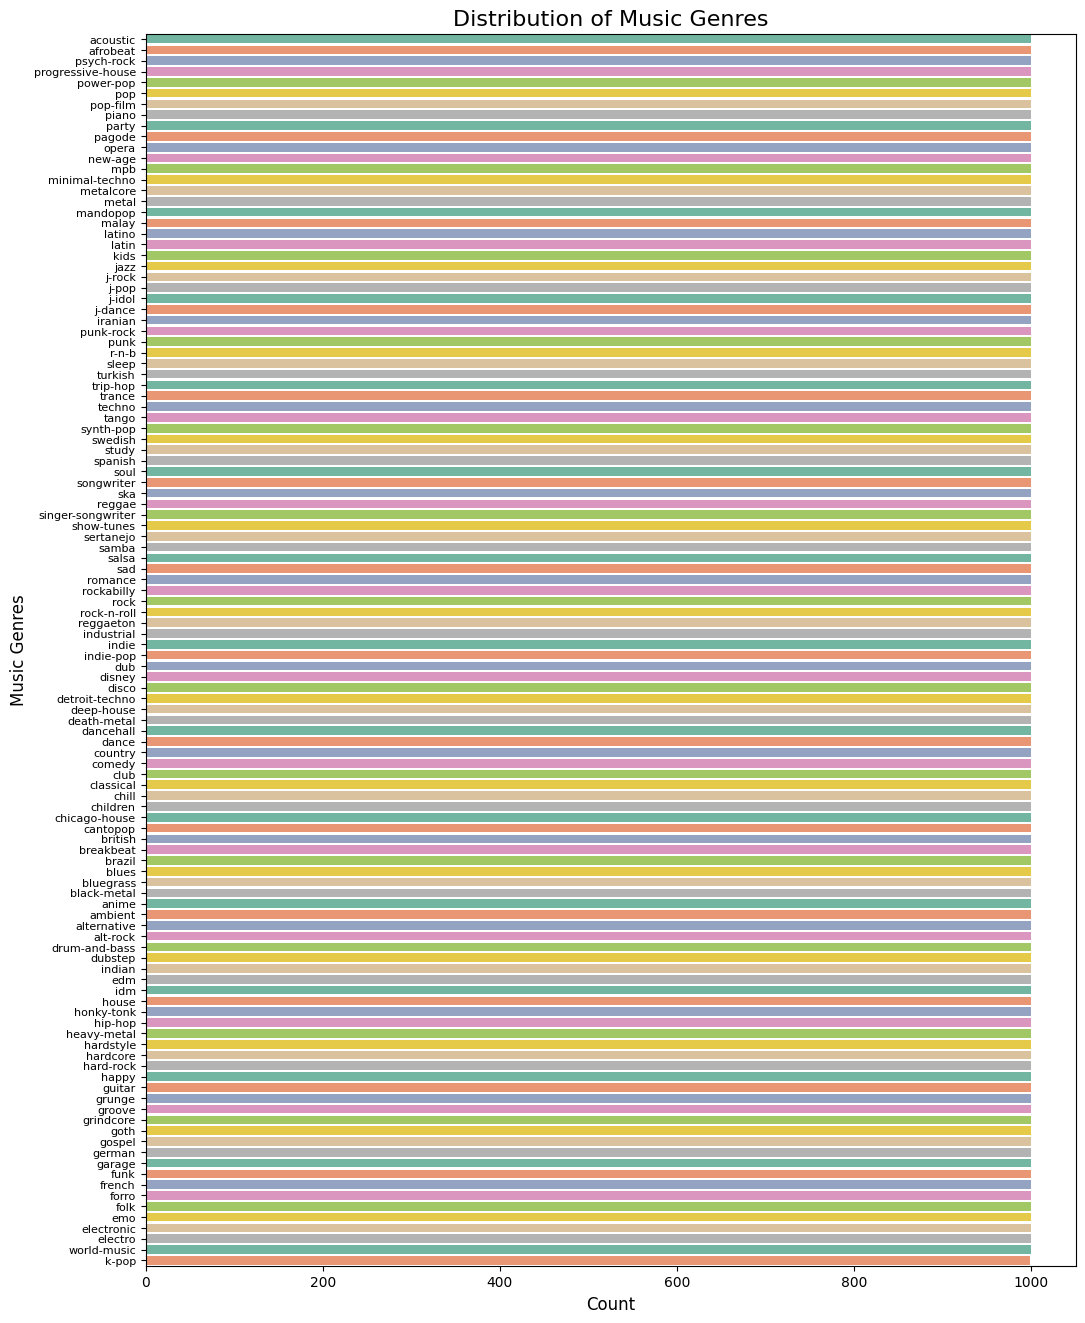

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 16))
sns.countplot(y='track_genre', data=spotify_data, palette='Set2', order=spotify_data['track_genre'].value_counts().index)
plt.title('Distribution of Music Genres', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Music Genres', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.show()

- The dataset is highly balanced, with 114 unique music genres represented. Almost all genres have exactly 1000 samples, except for one genre, **k-pop**, which has 999 samples. This slight difference is negligible and does not require any additional balancing steps such as under-sampling or over-sampling.
This balanced distribution ensures fair representation of all genres during model training, minimizing bias and providing reliable performance evaluation across all classes.

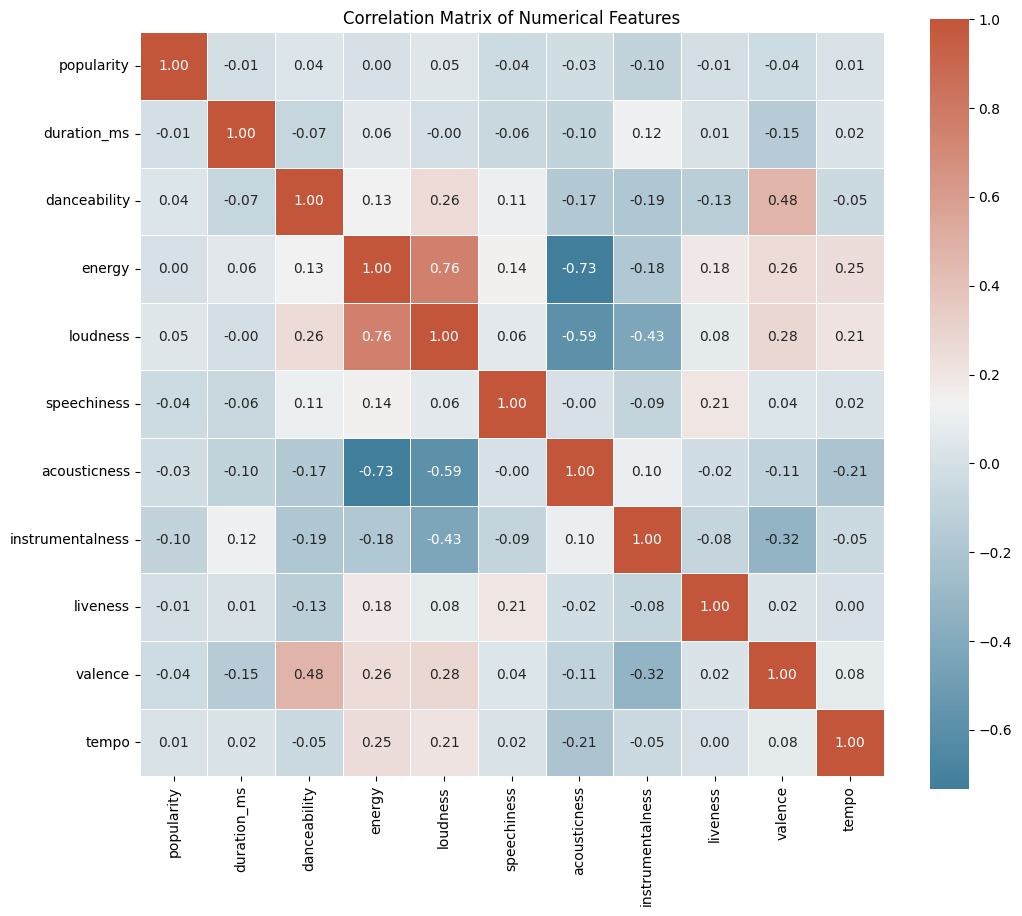

In [55]:
# Numeric Columns
numeric_cols = ["popularity","duration_ms","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]

# Build the numeric dataframe
numeric_df = spotify_data[numeric_cols]

# Create a figure
plt.figure(figsize=(12, 10))

# Plot title
plt.title("Correlation Matrix of Numerical Features")

# Compute the correlation matrix
corr = numeric_df.corr()

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, cmap=cmap, square = True)

# Display the plot
plt.show()

The correlation heatmap provides insights into the relationships between numerical features in the dataset. Notably:

- Energy and Loudness exhibit a strong positive correlation (0.76), indicating that louder tracks tend to have higher energy levels.
- Acousticness is negatively correlated with Energy (-0.73) and Loudness (-0.59), suggesting that more acoustic tracks are generally quieter and less energetic.
- Most other features have weak or negligible correlations, indicating they capture distinct characteristics of the tracks.

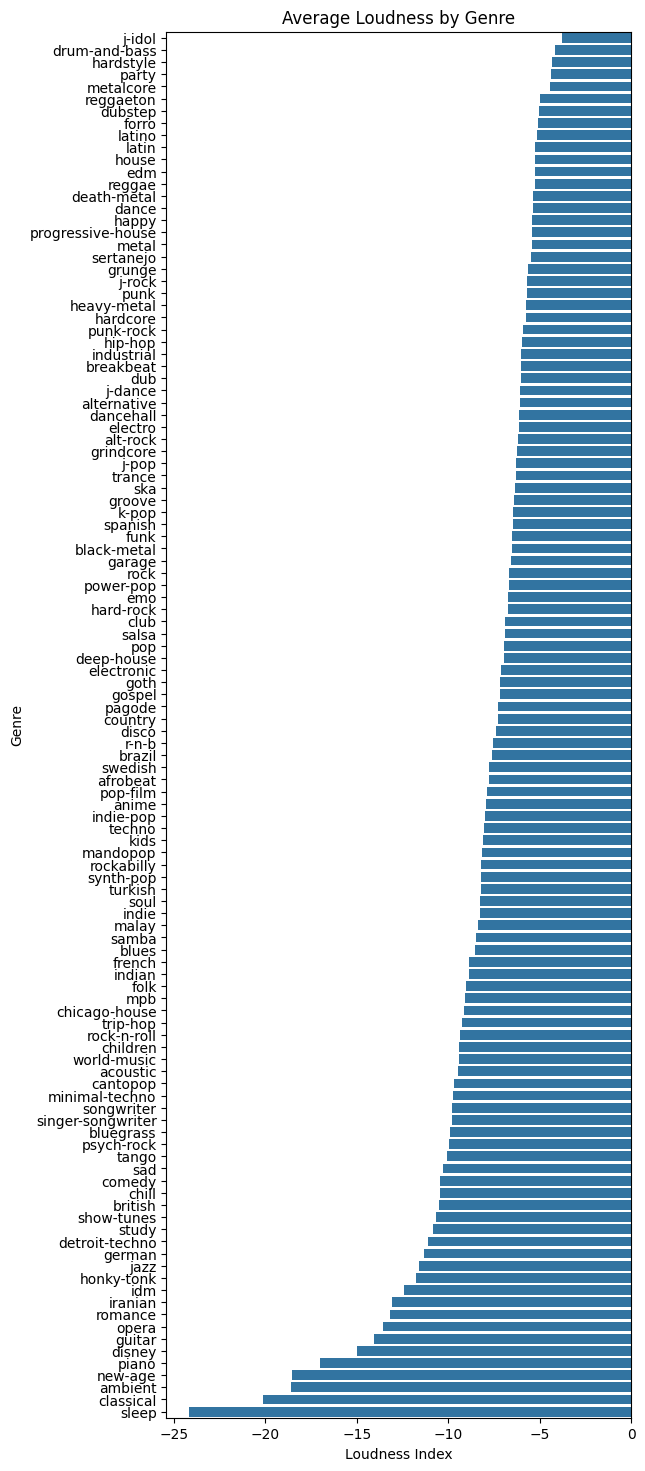

In [56]:
# Group by 'track_genre' and calculate mean for numeric columns only
averages = spotify_data.groupby('track_genre')[numeric_cols].mean()

# Sort the DataFrame by the mean value of 'loudness'
averages = averages.sort_values(by='loudness', ascending=False)

# Create a large-sized plot
plt.figure(figsize=(6, 18))
sns.barplot(x=averages['loudness'], y=averages.index, orient='h')  # Horizontal barplot for better fit
plt.title('Average Loudness by Genre')
plt.xlabel('Loudness Index')
plt.ylabel('Genre')
plt.show()


- The chart highlights the variation in average loudness across music genres. Softer genres such as "sleep," "classical," and "ambient" have the lowest loudness levels, while energetic genres like "j-idol," "drum-and-bass," and "hardstyle" have the highest. This suggests that loudness can be a key distinguishing feature for genre classification.

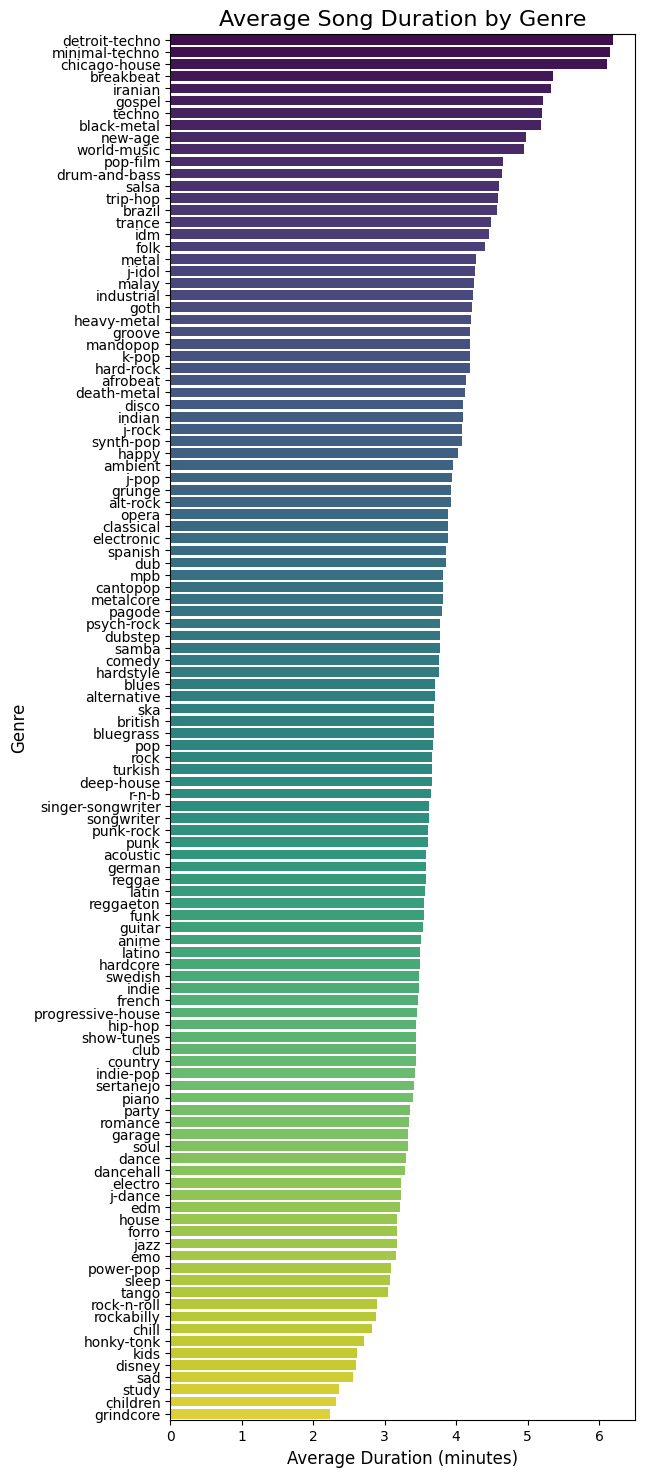

In [57]:
# Convert 'duration_ms' to minutes
averages['duration_min'] = averages['duration_ms'] / 60000

# Sort the averages DataFrame by 'duration_min'
averages_sorted_duration = averages.sort_values(by='duration_min', ascending=False)

# Plot average durations by genre
plt.figure(figsize=(6, 18))
sns.barplot(x=averages_sorted_duration['duration_min'], y=averages_sorted_duration.index, orient='h', palette="viridis")
plt.title('Average Song Duration by Genre', fontsize=16)
plt.xlabel('Average Duration (minutes)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

- The chart shows significant variation in average song durations across genres. Genres like "Detroit-techno" and "minimal-techno" have the longest durations, often exceeding 5 minutes, while genres like "grindcore" and "children" are much shorter, averaging under 2 minutes. This reflects the structural and audience-driven differences between genres, may make duration a valuable feature for classification.

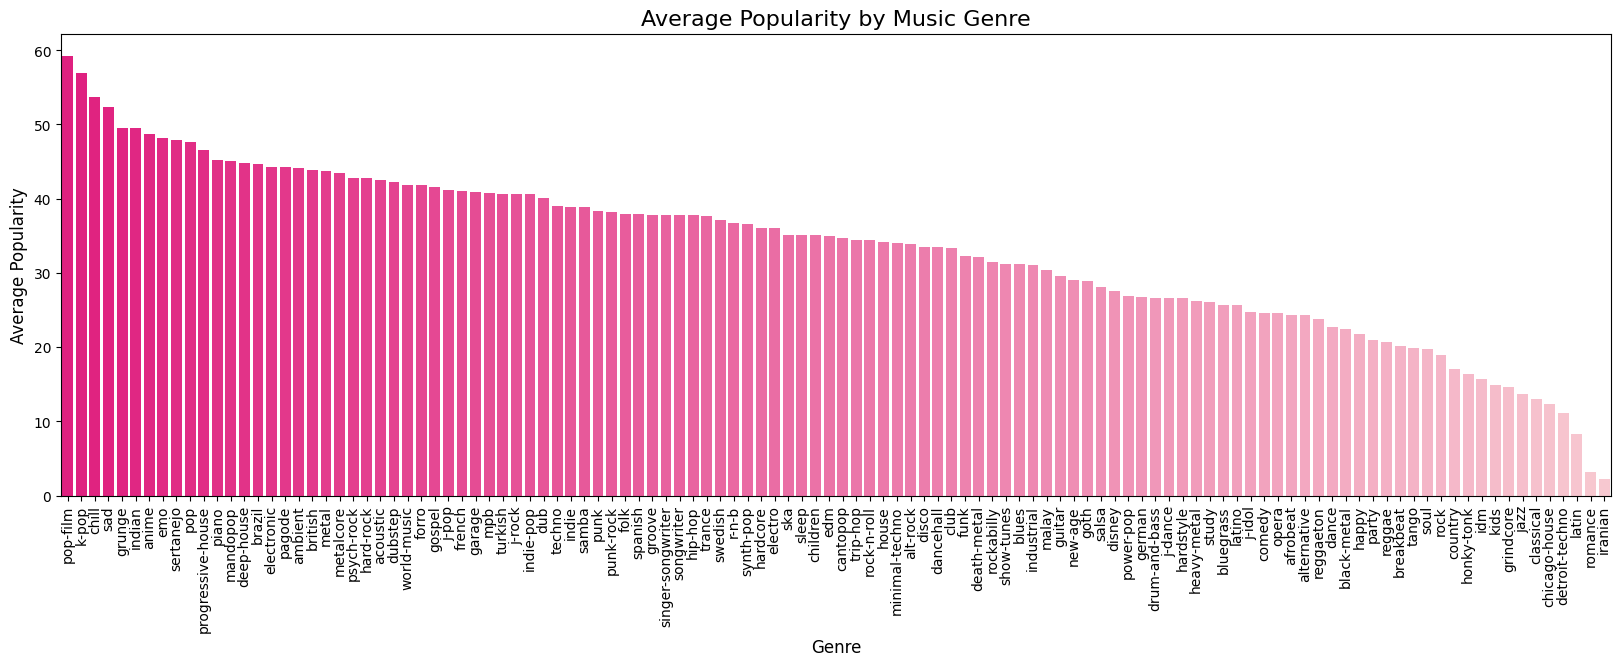

In [58]:
from matplotlib.colors import LinearSegmentedColormap

# Sort the averages DataFrame by 'popularity'
averages_sorted_popularity = averages.sort_values(by='popularity', ascending=False)

# Define the color map from light pink to dark pink
pink_palette = LinearSegmentedColormap.from_list("pink_shades", ["#ffc0cb", "#ff007f"])

# Plot average popularity by genre as a vertical barplot
plt.figure(figsize=(20, 6))
sns.barplot(
    x=averages_sorted_popularity.index, 
    y=averages_sorted_popularity['popularity'], 
    palette=pink_palette(np.linspace(1, 0, len(averages_sorted_popularity)))  # Reverse color order
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)
plt.title('Average Popularity by Music Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Popularity', fontsize=12)
plt.show()

- The chart displays the average popularity of songs across different music genres. Genres such as "pop-film," "k-pop," and "chill" are the most popular, while genres like "romance," "iranian," and "grindcore" are the least popular. This indicates significant variation in listener preferences, with certain genres achieving broader mainstream appeal. The gradient from dark to light pink visually emphasizes the popularity differences, with darker colors representing higher popularity.

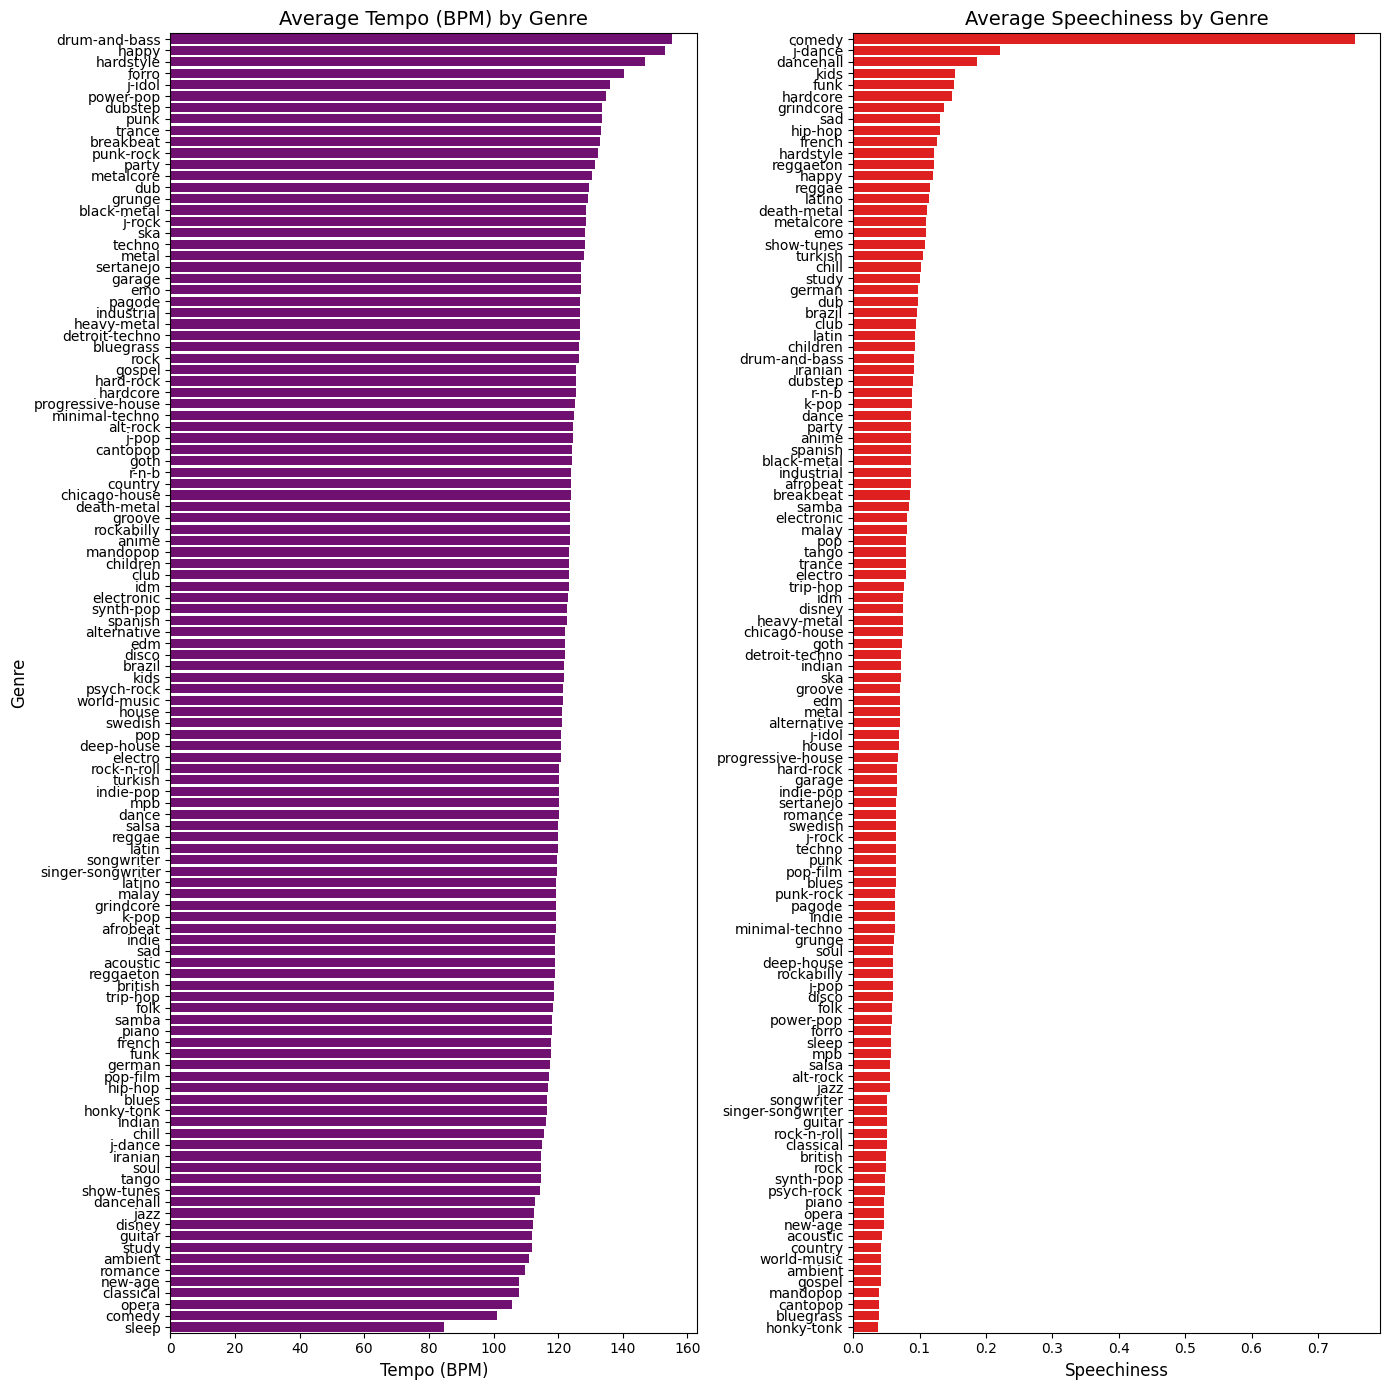

In [59]:
# Sort averages DataFrame by tempo and speechiness for descending order
averages_sorted_tempo = averages.sort_values(by='tempo', ascending=False)
averages_sorted_speechiness = averages.sort_values(by='speechiness', ascending=False)

# Create two side-by-side plots with solid colors
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 14), sharey=False)

# Plot for tempo with solid blue
sns.barplot(x=averages_sorted_tempo['tempo'], y=averages_sorted_tempo.index, orient='h', ax=ax1, color="purple")
ax1.set_title('Average Tempo (BPM) by Genre', fontsize=14)
ax1.set_xlabel('Tempo (BPM)', fontsize=12)
ax1.set_ylabel('Genre', fontsize=12)

# Plot for speechiness with solid red
sns.barplot(x=averages_sorted_speechiness['speechiness'], y=averages_sorted_speechiness.index, orient='h', ax=ax2, color="red")
ax2.set_title('Average Speechiness by Genre', fontsize=14)
ax2.set_xlabel('Speechiness', fontsize=12)
ax2.set_ylabel('')  # Remove duplicate y-axis label

# Adjust layout and display
plt.tight_layout()
plt.show()

- Average Tempo by Genre:
The left graph highlights the average tempo (measured in BPM) for each genre. Fast-paced genres like drum-and-bass, hardstyle, and hardcore exhibit the highest tempos, indicating their energetic and rhythmic nature. In contrast, genres such as sleep, comedy, and ambient have much slower tempos, aligning with their relaxed or calm characteristics.

- Average Speechiness by Genre:
The right graph showcases the average speechiness for each genre. Genres like comedy, kids, and hip-hop have the highest speech content, likely due to the presence of spoken words or rap elements. Meanwhile, instrumental genres like classical and ambient have very low speechiness, reflecting their focus on musical composition rather than lyrics.

<Figure size 1200x1800 with 0 Axes>

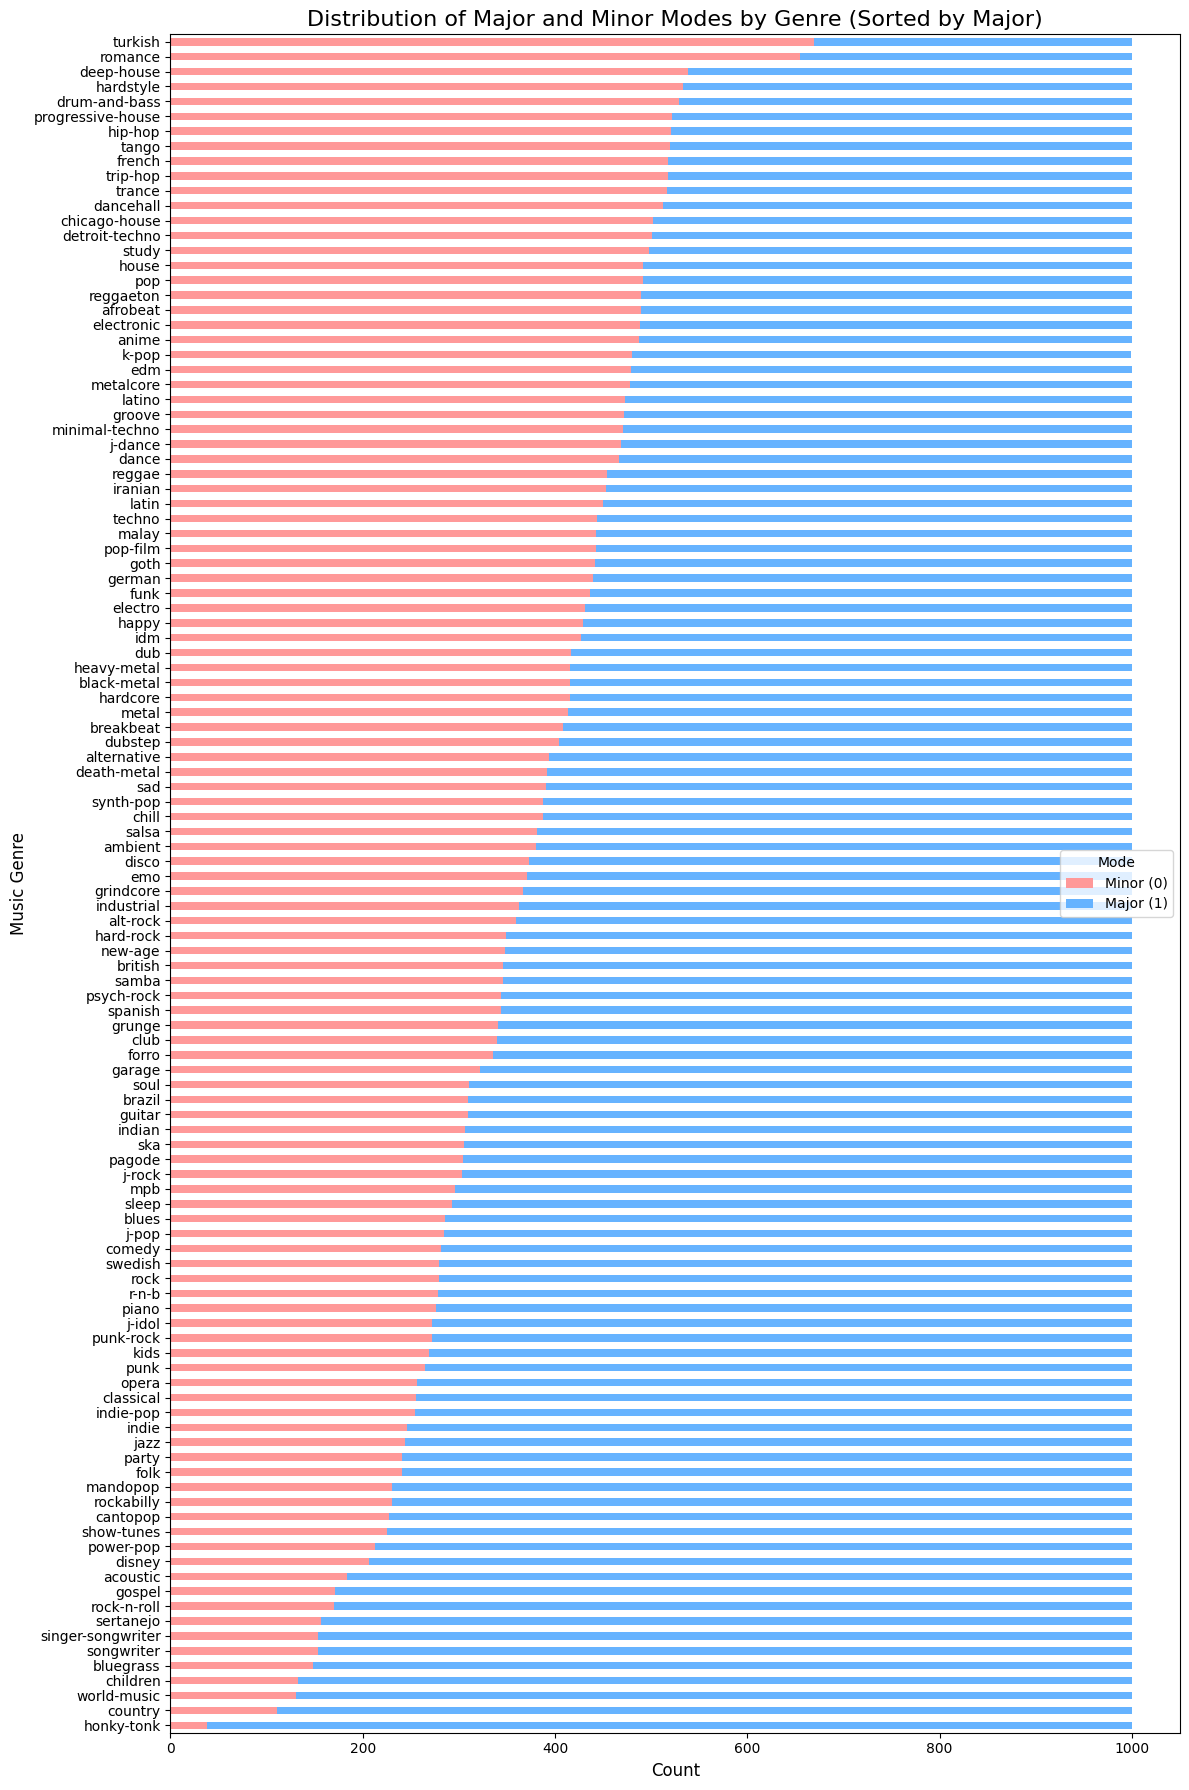

In [60]:
# Calculate the count of major (1) and minor (0) modes for each genre
mode_counts = spotify_data.groupby('track_genre')['mode'].value_counts().unstack().fillna(0)

# Sort by Major Mode (1) count in descending order
mode_counts_sorted = mode_counts.sort_values(by=1, ascending=False)

# Create the horizontal bar plot
plt.figure(figsize=(12, 18))
mode_counts_sorted.plot(kind='barh', stacked=True, color=['#FF9999', '#66B3FF'], figsize=(12, 18))

# Add title and labels
plt.title('Distribution of Major and Minor Modes by Genre (Sorted by Major)', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Music Genre', fontsize=12)
plt.legend(['Minor (0)', 'Major (1)'], title='Mode', fontsize=10)
plt.tight_layout()

plt.show()


- The chart shows the distribution of major (blue) and minor (red) modes across music genres. Genres like pop, reggaeton, and electronic favor major modes, often associated with uplifting tones. In contrast, goth, metal, and industrial lean towards minor modes, reflecting darker and more intense emotions. Some genres, such as rock and jazz, show a balanced use of both modes, highlighting their musical diversity.

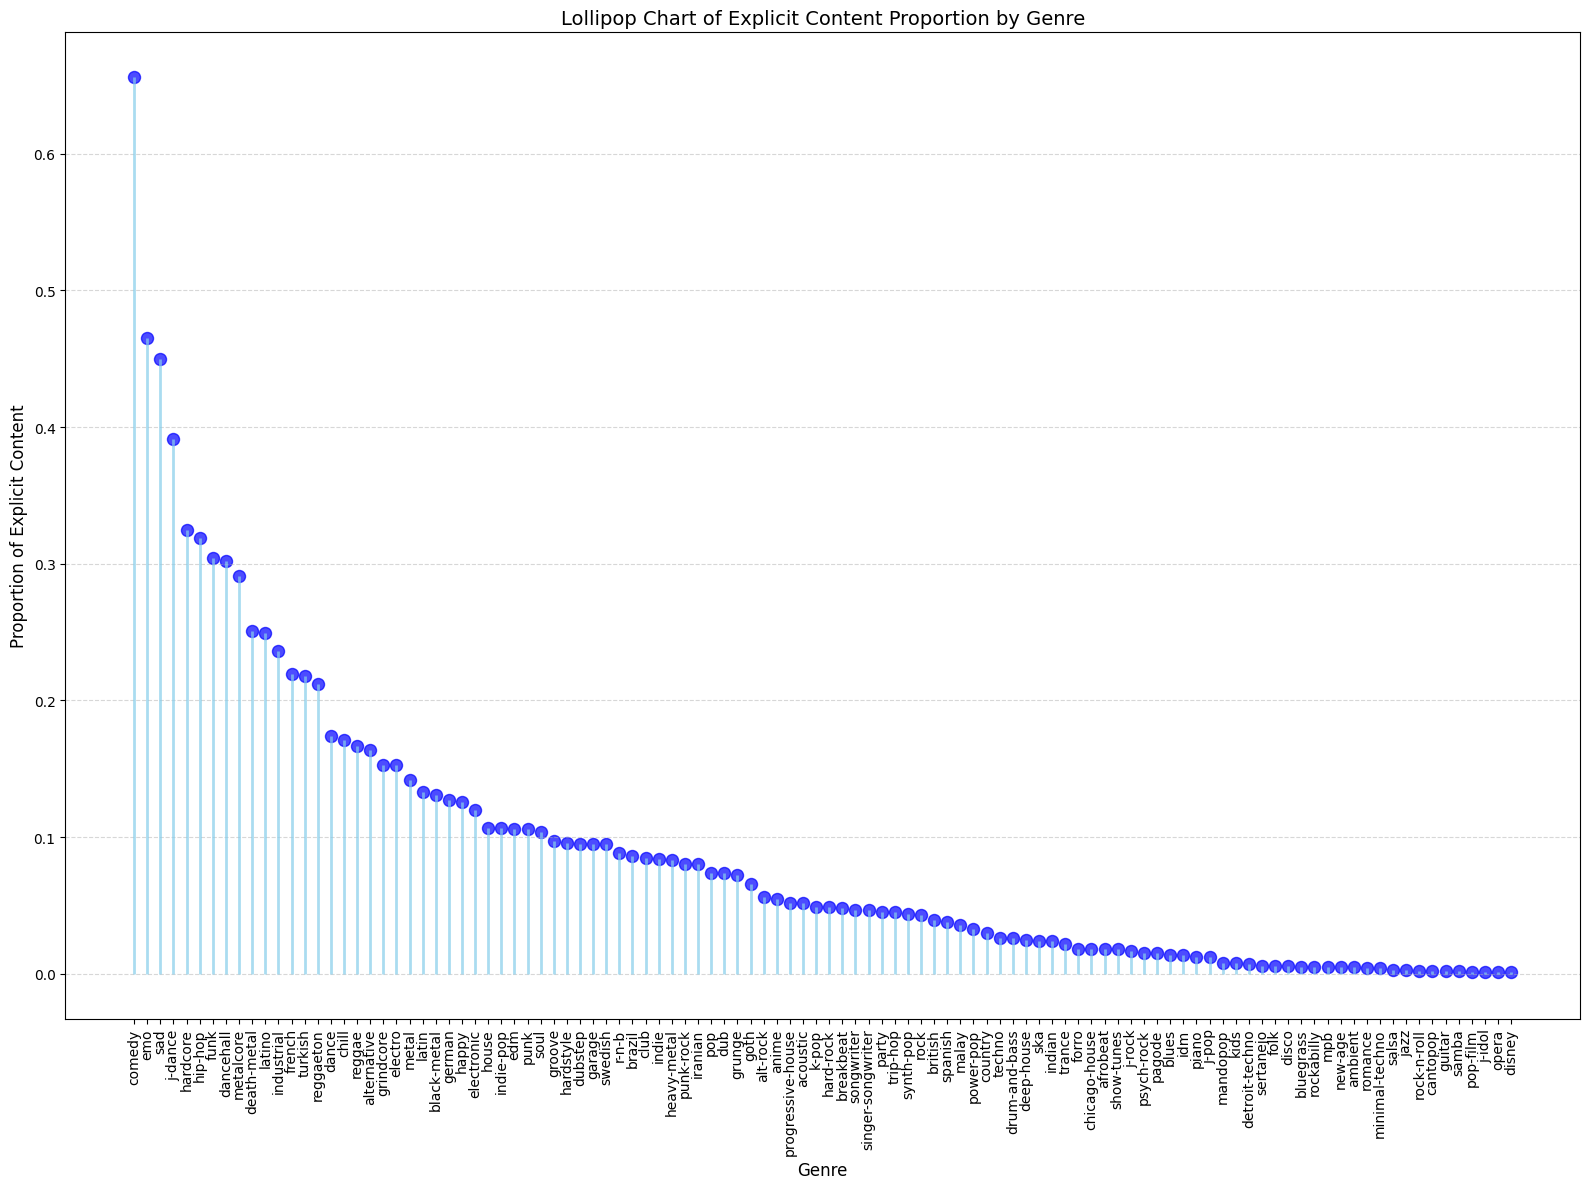

In [61]:
# Step 1: Calculate explicit proportions
explicit_proportions = (
    spotify_data.groupby('track_genre')['explicit']
    .mean()
    .sort_values(ascending=False)
)

# Step 2: Filter for genres with non-zero explicit proportions
non_zero_explicit = explicit_proportions[explicit_proportions > 0]

# Step 3: Create the lollipop chart
plt.figure(figsize=(16, 12))
genres = non_zero_explicit.index
proportions = non_zero_explicit.values

# Plot the vertical lines
plt.vlines(x=genres, ymin=0, ymax=proportions, color='skyblue', alpha=0.7, linewidth=2)

# Plot the dots
plt.scatter(x=genres, y=proportions, color='blue', alpha=0.7, s=75)

# Add titles and labels
plt.title('Lollipop Chart of Explicit Content Proportion by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Proportion of Explicit Content', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


- Genres with high explicit content proportions, such as comedy, emo, and j-dance, could be important features for the model. These genres may provide valuable insights into audience preferences or help predict content-related trends.

# Methodologies
Note: We do not need a null value imputation step since out dataset does not include any null values.

### Data Cleaning

In [62]:
# Check duplicates
duplicates = spotify_data[spotify_data.duplicated()]
print("Number of duplicate rows:", len(duplicates))

# Remove duplicates
spotify_data = spotify_data.drop_duplicates()

Number of duplicate rows: 450


In [63]:
print("Number of rows after removing duplicates:", len(spotify_data))

Number of rows after removing duplicates: 113549


### Feature Engineering

In [64]:
non_sound_based_categories = ['british','french','german','swedish','spanish','indian','malay','turkish','world-music','gospel']
spotify_data = spotify_data.drop(spotify_data[spotify_data['track_genre'].isin(non_sound_based_categories)].index)

- To concentrate on predicting genres solely based on audio characteristics, we will exclude categories like 'British,' 'French,' or 'German' from the target variable. These labels are tied to origin or language, which cannot be inferred from the dataset's audio features. (However, if the dataset included lyrics, these classifications would likely be straightforward to determine) 

In [65]:
spotify_data.shape

(103592, 20)

In [66]:
# Drop non explanatory features
spotify_data = spotify_data.drop(columns = ['track_id','artists','album_name','track_name'])

In [67]:
# Checking unique values in categorical columns
print("Unique values in 'explicit':", spotify_data['explicit'].unique())
print("Unique values in 'mode':", spotify_data['mode'].unique())
print("Unique values in 'key':", spotify_data['key'].unique())
print("Unique values in 'time_signature':", spotify_data['time_signature'].unique())

Unique values in 'explicit': [False  True]
Unique values in 'mode': [0 1]
Unique values in 'key': [ 1  0  2  6 11  8  4  7  3 10  5  9]
Unique values in 'time_signature': [4 3 1 5 0]


In [68]:
# Print min and max values for each numeric column
print("Minimum and Maximum Values for Numeric Columns:\n")
for column in numeric_cols:
    min_val = spotify_data[column].min()
    max_val = spotify_data[column].max()
    print(f"{column}:")
    print(f"  Min: {min_val}")
    print(f"  Max: {max_val}")

Minimum and Maximum Values for Numeric Columns:

popularity:
  Min: 0
  Max: 100
duration_ms:
  Min: 8586
  Max: 5237295
danceability:
  Min: 0.0
  Max: 0.985
energy:
  Min: 0.0
  Max: 1.0
loudness:
  Min: -49.531
  Max: 4.532
speechiness:
  Min: 0.0
  Max: 0.965
acousticness:
  Min: 0.0
  Max: 0.996
instrumentalness:
  Min: 0.0
  Max: 1.0
liveness:
  Min: 0.0
  Max: 1.0
valence:
  Min: 0.0
  Max: 0.995
tempo:
  Min: 0.0
  Max: 243.372


In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Map the explicit column to binary values
spotify_data['explicit'] = spotify_data['explicit'].map({False: 0,True: 1})
cat_cols = ["explicit", "mode", "key", "time_signature"]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(drop='if_binary', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'  
)

This code preprocesses our columns as follows:

1. *Mapping explicit to binary values*: Mapped to False → 0, True → 1.
2. *Defining categorical columns*: explicit, mode, key, time_signature.
3. *Setting up preprocessing with ColumnTransformer*:
   - *Numeric columns*: Previously defined numeric columns: `popularity`, `duration_ms`, `danceability`, `energy`, `loudness`, `speechiness`, `acousticness`, `instrumentalness`, `liveness`, `valence`, `tempo`. Scaled with the `StandardScaler` -which standardizes features to have a mean of 0 and a standard deviation of 1, to ensure all features are on a similar scale, avoiding dominance by features with larger ranges (e.g., `duration_ms`).
   - *Categorical columns*: One-hot encoded with OneHotEncoder (binary columns excluded -`mode` is already binary (0 = minor, 1 = major)).
   - *remainder='passthrough'*: Keeps non-specified columns unchanged.

   This steps ensure fair contribution of all features to the machine learning models.

In [70]:
spotify_data.isnull().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

- During the EDA, we noticed many genres share high similarities, making classification challenging. To address this, we can merge similar genres using hierarchical clustering.

- First, we create a new dataframe with the average values of music metrics for each genre, reducing each genre to a single data point. Then, we generate a dendrogram to visualize how genres cluster based on feature similarities. By analyzing the dendrogram, we can decide on the optimal number of clusters, simplifying the genre set effectively.

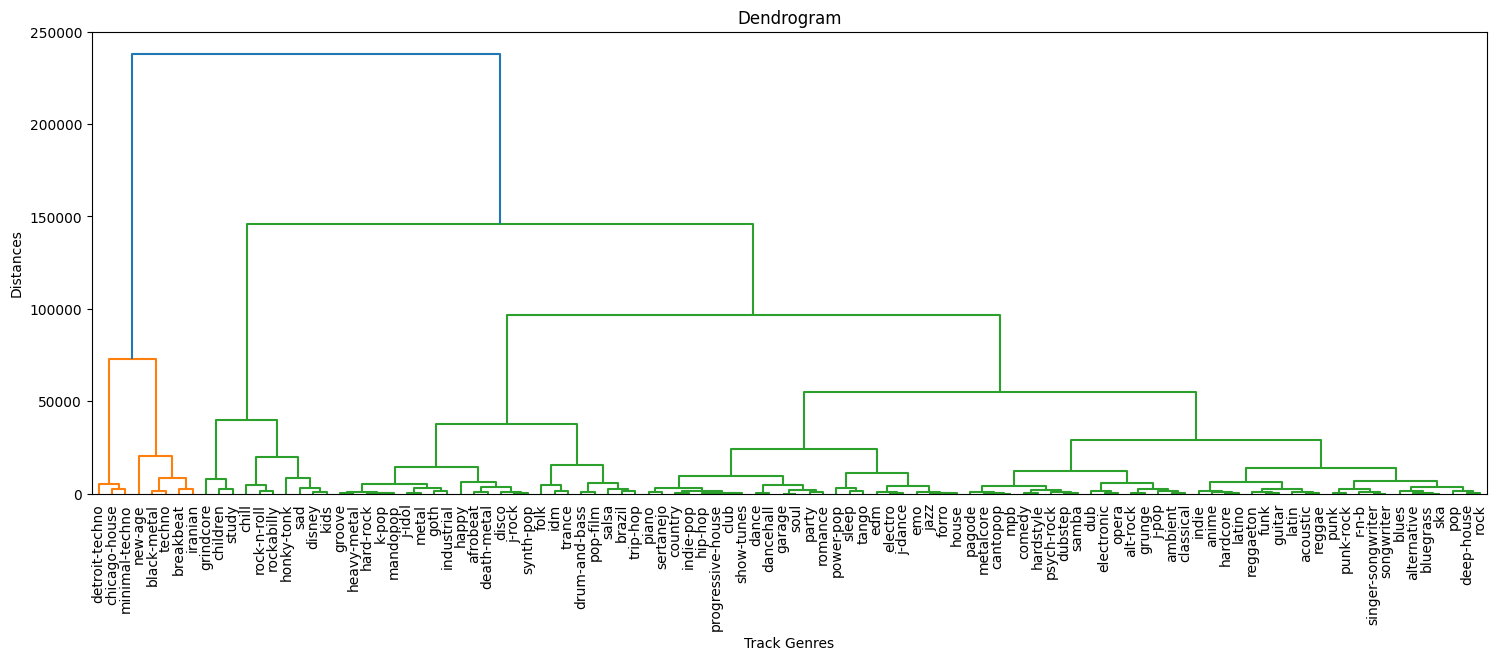

In [71]:
import scipy.cluster.hierarchy as sch

# Group by genre
genres_average = spotify_data.groupby('track_genre').mean()

# Perform hierarchical clustering
plt.figure(figsize=(18, 6))
dendrogram = sch.dendrogram(sch.linkage(genres_average, method='complete'), labels=genres_average.index)

# Show the dendrogram
plt.title('Dendrogram')
plt.xlabel('Track Genres')
plt.ylabel('Distances')

# Increase the size of x-labels
plt.tick_params(axis='x', labelsize=10)

# Show the plot
plt.show()

- By setting a distance threshold of 1, we can effectively reduce the number of genres by nearly half. Using `scipy`'s `fcluster` function, we can generate the final clusters in a dictionary-like structure, making it highly convenient for our analysis.

In [72]:
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering
linkage_matrix = sch.linkage(genres_average, method='complete')

# Specify the distance threshold
threshold = 1

# Extract the cluster labels based on the threshold
clusters = fcluster(linkage_matrix, threshold, criterion='distance')

# Add cluster labels to the original DataFrame
genres_average['Cluster'] = clusters

# Set the maximum number of rows to display
pd.set_option('display.max_rows', 60)

# Create a dictionary to store classes and clusters
cluster_dict = {}
for i, (cluster, category) in enumerate(zip(clusters, genres_average.index)):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = []
    cluster_dict[cluster].append(category)

ordered_cluster_dict = dict(sorted(cluster_dict.items()))

# Display the dictionary sorted by cluster    
ordered_cluster_dict

{1: ['chicago-house'],
 2: ['minimal-techno'],
 3: ['detroit-techno'],
 4: ['black-metal'],
 5: ['techno'],
 6: ['breakbeat'],
 7: ['iranian'],
 8: ['new-age'],
 9: ['children'],
 10: ['study'],
 11: ['grindcore'],
 12: ['rock-n-roll'],
 13: ['rockabilly'],
 14: ['chill'],
 15: ['disney'],
 16: ['kids'],
 17: ['sad'],
 18: ['honky-tonk'],
 19: ['groove'],
 20: ['heavy-metal'],
 21: ['k-pop'],
 22: ['mandopop'],
 23: ['hard-rock'],
 24: ['j-idol'],
 25: ['metal'],
 26: ['goth'],
 27: ['industrial'],
 28: ['afrobeat'],
 29: ['death-metal'],
 30: ['j-rock'],
 31: ['synth-pop'],
 32: ['disco'],
 33: ['happy'],
 34: ['idm'],
 35: ['trance'],
 36: ['folk'],
 37: ['drum-and-bass'],
 38: ['pop-film'],
 39: ['brazil'],
 40: ['trip-hop'],
 41: ['salsa'],
 42: ['piano'],
 43: ['sertanejo'],
 44: ['country'],
 45: ['indie-pop'],
 46: ['hip-hop'],
 47: ['progressive-house'],
 48: ['club'],
 49: ['show-tunes'],
 50: ['dance'],
 51: ['dancehall'],
 52: ['garage'],
 53: ['soul'],
 54: ['party'],
 55: 

- With this dictionary, we assign meaningful names to the clusters and update the target variable to reflect the new genre groups. This process reduced the number of genres from 114 to 56. It’s important to note that using a larger distance threshold can further reduce the number of genres, but overly merging them risks losing interpretability by grouping together genres with minimal similarity.

In [73]:
# Dictionary with descriptive names

consolidated_genres = {'agressive-fusion': ['dubstep', 'grunge', 'metal'],
                       'industrial': ['goth', 'heavy-metal', 'industrial'],
                       'punk-rock': ['alt-rock', 'garage', 'hard-rock', 'j-rock', 'punk', 'punk-rock'],
                       'hardstyle': ['happy', 'hardstyle'],
                       'disco-ska': ['disco', 'ska', 'synth-pop'],
                       'rock': ['alternative', 'rock'],
                       'anime': ['anime', 'club'],
                       'edm-house': ['deep-house', 'electronic', 'progressive-house'],
                       'edm': ['dub', 'edm', 'electro', 'groove', 'house'],
                       'j-dance': ['dancehall', 'j-dance'],
                       'funk-hip-hop': ['funk', 'hip-hop'],
                       'latin': ['dance', 'latin', 'latino', 'reggae', 'reggaeton'],
                       'pop': ['k-pop', 'pop', 'pop-film'],
                       'brazilian': ['brazil', 'mpb'],
                       'blues-rnb': ['blues', 'j-pop', 'r-n-b'],
                       'indie': ['folk', 'indie', 'indie-pop', 'psych-rock'],
                       'chill': ['chill', 'sad'],
                       'pagode-samba': ['pagode', 'samba', 'sertanejo'],
                       'country-soul': ['country', 'soul'],
                       'rock-n-roll': ['rock-n-roll', 'rockabilly'],
                       'chicago-house': ['chicago-house', 'detroit-techno'],
                       'jazz-tango': ['honky-tonk', 'jazz', 'tango'],
                       'vocal-pop': ['acoustic', 'cantopop', 'mandopop', 'singer-songwriter', 'songwriter'],
                       'disney': ['disney', 'guitar'],
                       'soundscape': ['ambient', 'new-age']}

# Create a dictionary to map old genres to new genres
genre_map = {old_genre: new_genre for new_genre, old_genres in consolidated_genres.items() for old_genre in old_genres}

# Replace the old genres with the new genres
spotify_data['track_genre'] = spotify_data['track_genre'].replace(genre_map)

In [74]:
from sklearn.preprocessing import LabelEncoder

# Define the target and explanatory features
X = spotify_data.drop("track_genre", axis=1)
y = spotify_data["track_genre"]

# Perform Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [75]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess our X_train and X_test datasets by using the pipeline we've created
X_train = preprocessor.fit_transform(X_train_raw)
X_test = preprocessor.transform(X_test_raw)

# Transform the train and test data into float
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

## Model 1: Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import top_k_accuracy_score, accuracy_score
from sklearn.pipeline import Pipeline

# Random Forest pipeline
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("rf", RandomForestClassifier(random_state=42))
])

rf_param_grid = {
    "rf__n_estimators": [50, 100, 200],
    "rf__max_depth": [None, 10, 20],
    "rf__min_samples_split": [2, 5],
    "rf__min_samples_leaf": [1, 2]
}

In [77]:
from sklearn.model_selection import GridSearchCV

# Random Forest Grid Search
rf_grid_search = GridSearchCV(
    estimator=rf_pipeline, 
    param_grid=rf_param_grid, 
    scoring='f1_weighted', 
    cv=3, 
    verbose=1,
    n_jobs=-1
)
rf_grid_search.fit(X_train_raw, y_train)

print("Best Hyperparameters for Random Forest:", rf_grid_search.best_params_)
print("Best F1 (Weighted) for RF:", rf_grid_search.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters for Random Forest: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best F1 (Weighted) for RF: 0.4657089249718398


In [78]:
# Retrieve best models
best_rf_model = rf_grid_search.best_estimator_

# Predict probabilities (needed for Top-k)
rf_y_pred_probs = best_rf_model.predict_proba(X_test_raw)

# Predict labels
rf_y_pred_labels = best_rf_model.predict(X_test_raw)

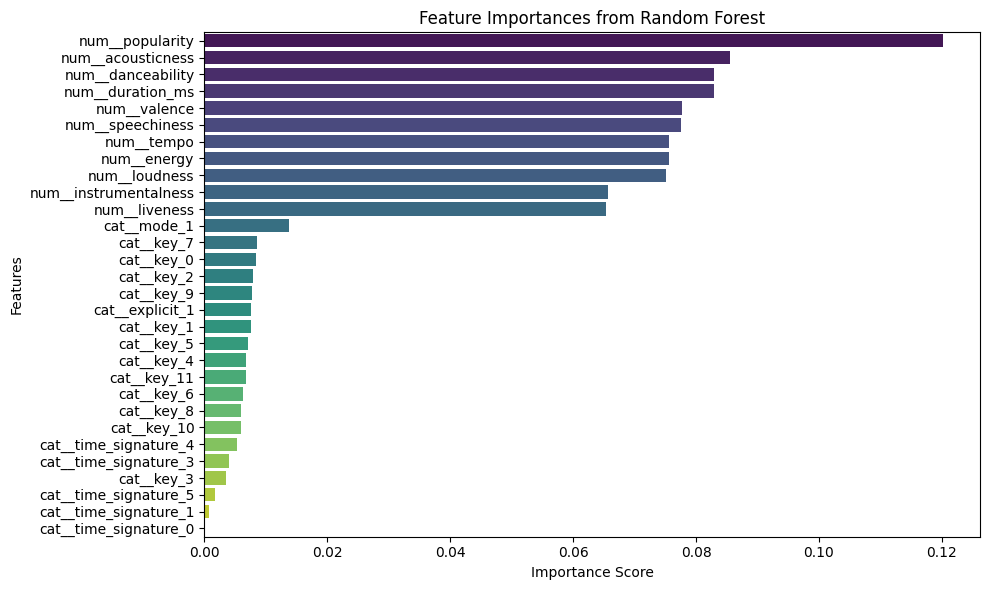

In [79]:
importances = best_rf_model.named_steps['rf'].feature_importances_
feature_names = preprocessor.get_feature_names_out()

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importances from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

- The feature importance analysis from the Random Forest model reveals that numerical features such as popularity, duration_ms, acousticness, and danceability play the most significant roles in predicting music genres. In contrast, categorical features like key and time_signature have relatively lower importance.

## Model 2: KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier

# KNN pipeline
knn_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("knn", KNeighborsClassifier())
])

knn_param_grid = {
    # Number of neighbors
    "knn__n_neighbors": [5, 10, 15],
    # Distance metric: p=1 is Manhattan, p=2 is Euclidean
    "knn__p": [1, 2],
    # Weight function used in prediction
    "knn__weights": ["uniform", "distance"]
}

In [81]:
# KNN Grid Search
knn_grid_search = GridSearchCV(
    estimator=knn_pipeline, 
    param_grid=knn_param_grid, 
    scoring='f1_weighted', 
    cv=3, 
    verbose=1,
    n_jobs=-1
)
knn_grid_search.fit(X_train_raw, y_train)

print("Best Hyperparameters for KNN:", knn_grid_search.best_params_)
print("Best F1 (Weighted) for KNN:", knn_grid_search.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Hyperparameters for KNN: {'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'distance'}
Best F1 (Weighted) for KNN: 0.37552729679701796


In [82]:
# Retrieve best models
best_knn_model = knn_grid_search.best_estimator_

# Predict probabilities (needed for Top-k)
knn_y_pred_probs = best_knn_model.predict_proba(X_test_raw)

# Predict labels
knn_y_pred_labels = best_knn_model.predict(X_test_raw)

In [87]:
def calculate_metrics(y_true, y_pred_probs, y_pred_labels, k_values, average='weighted'):
    """
    Calculates:
      - F1-score (weighted)
      - Top-k accuracy
    """
    import numpy as np
    from sklearn.metrics import f1_score
    import tensorflow as tf

    metrics = {}

    # Convert y_test and y_pred_probs to float32 for TF ops
    y_true = y_true.astype(np.float32)
    y_pred_probs = y_pred_probs.astype(np.float32)

    # F1-score
    f1 = f1_score(y_true, y_pred_labels, average=average)
    metrics["F1-score"] = f1 * 100  # to percentage

    # Top-k accuracy
    for k in k_values:
        top_k_accuracy = tf.keras.metrics.sparse_top_k_categorical_accuracy(
            y_true, y_pred_probs, k=k
        )
        metrics[f"Top-{k} Accuracy"] = np.mean(top_k_accuracy) * 100  # to percentage

    return metrics

# Define k values for Top-k
k_values = [1, 3, 5]

knn_metrics = calculate_metrics(y_test, knn_y_pred_probs, knn_y_pred_labels, k_values)
rf_metrics = calculate_metrics(y_test, rf_y_pred_probs, rf_y_pred_labels, k_values)

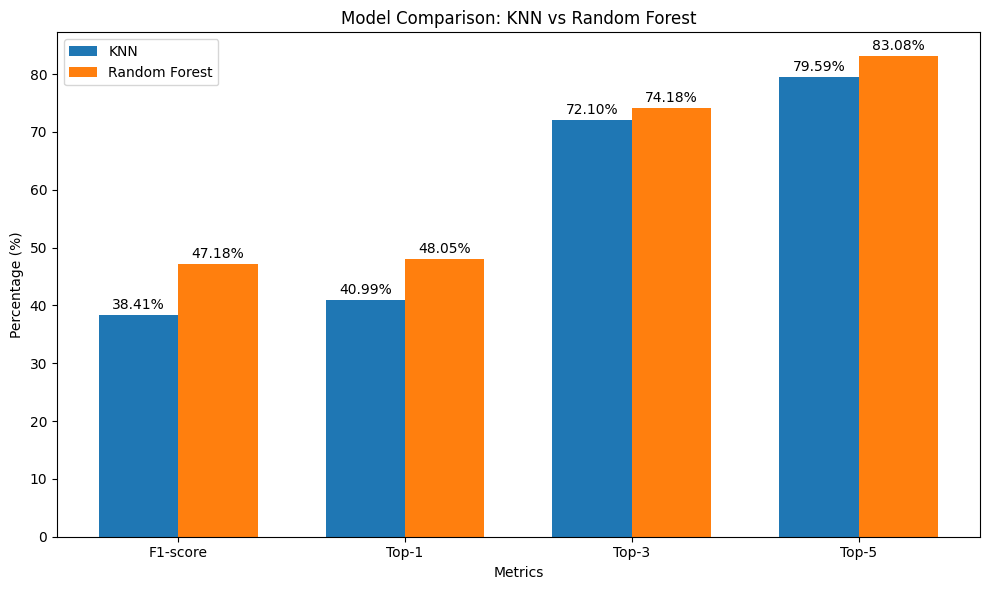

In [88]:
labels = ["F1-score"] + [f"Top-{k}" for k in k_values]
knn_scores = [knn_metrics["F1-score"]] + [knn_metrics[f"Top-{k} Accuracy"] for k in k_values]
rf_scores = [rf_metrics["F1-score"]] + [rf_metrics[f"Top-{k} Accuracy"] for k in k_values]

x = np.arange(len(labels))  # label locations
width = 0.35

plt.figure(figsize=(10, 6))
bar1 = plt.bar(x - width/2, knn_scores, width, label='KNN')
bar2 = plt.bar(x + width/2, rf_scores, width, label='Random Forest')

plt.ylabel('Percentage (%)')
plt.xlabel('Metrics')
plt.title('Model Comparison: KNN vs Random Forest')
plt.xticks(x, labels)
plt.legend()

# Add value labels on top
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + 0.5, 
        f'{height:.2f}%', 
        ha='center', 
        va='bottom'
    )

plt.tight_layout()
plt.show()

In [89]:
comparison_data = {
    "Metric": labels,
    "KNN (%)": knn_scores,
    "Random Forest (%)": rf_scores
}
comparison_df = pd.DataFrame(comparison_data)
print("\nComparison of Tuned Models:")
print(comparison_df.to_string(index=False))


Comparison of Tuned Models:
  Metric  KNN (%)  Random Forest (%)
F1-score    38.41              47.18
   Top-1    40.99              48.05
   Top-3    72.10              74.18
   Top-5    79.59              83.08


### Results


When we compare the results of our **KNN** and **Random Forest** algorithms on the test dataset based on our chosen classification metrics (F1-score and Top-k accuracy), the results are as follows:

<br>

| Rank | Model           | F1 Score | Top-1 Accuracy | Top-3 Accuracy | Top-5 Accuracy |
|-----:|:---------------:|---------:|---------------:|---------------:|---------------:|
| 1    | **Random Forest** | 47.18%  | 48.05%        | 74.18%        | 83.08%        |
| 2    | **KNN**           | 38.41%  | 40.99%        | 72.10%        | 79.59%        |

<br>

Overall, the **Random Forest** model outperformed the **KNN** model in terms of F1 score and Top-k accuracy on our dataset. However, it is important to consider other factors—such as interpretability, computational efficiency, and the specific requirements of the project—when selecting the final algorithm.

For this case, because we prioritize higher predictive performance over interpretability, **Random Forest** emerges as our top choice. Its ability to capture both linear and non-linear relationships contributes to this improved performance compared to KNN, which relies on proximity in feature space and lacks a direct feature-importance mechanism.

Still, it is possible that fine-tuning hyperparameters over a broader range or applying different feature engineering strategies might further boost the performance of either model. Future improvements could include:
- Testing advanced techniques like **XGBoost**.
- Extracting additional signal from the dataset (e.g., more feature engineering or more audio-derived features).
- Exploring model ensembling strategies beyond a single algorithm.

Despite these possible avenues of enhancement, **Random Forest** currently provides the most robust performance for our music genre classification task.

### Conclusion
  
In this study, we utilized the **Spotify Tracks Dataset** from the Hugging Face Datasets repository, which contains detailed information on songs’ audio features, metadata, and popularity. Our primary goal was to build a **multi-class classification** model that predicts a track’s genre using attributes such as **danceability**, **energy**, and **acousticness**, among others. Below is a summary of our workflow and findings:

1. **Data Exploration**  
   - Investigated the distribution of numerical features (e.g., loudness, tempo) and categorical variables (e.g., explicit, mode).  
   - Visualized correlations, genre frequencies, and performed high-level analyses to spot potential data nuances (e.g., similarities among genres).

2. **Data Cleaning**  
   - Removed rows with missing or invalid values.  
   - Dropped duplicates to ensure each track is uniquely represented.  
   - Excluded non-sound-based categories (e.g., 'british', 'french', 'turkish') that rely on language or origin, which are not directly inferable from audio features.

3. **Feature Engineering**  
   - Applied **hierarchical clustering** on average metrics by genre to merge highly similar genres, reducing our label space from 114 to 56.  
   - Mapped `explicit` to binary values (0 or 1).  
   - Scaled numeric features (e.g., `loudness`, `tempo`) using **StandardScaler** and applied **OneHotEncoder** to categorical columns (e.g., `key`, `time_signature`) 
   via a   **ColumnTransformer**.

4. **Model Building & Hyperparameter Tuning**  
   - Trained two different algorithms: **k-Nearest Neighbors (KNN)** and **Random Forest**.  
   - Conducted **Grid Search** with cross-validation to find the best hyperparameters for each model.  
   - Evaluated model performance using **F1-score (weighted)** and **Top-k accuracy**.

5. **Interpretation & Future Work**  
   - **Random Forest**: By design, it handles both linear and non-linear relationships well and offers built-in methods (e.g., `feature_importances_`) to identify the most impactful features (e.g., popularity, duration, acousticness, danceability).  
   - **KNN**: Although simpler to understand, it lacks a direct feature-importance mechanism. We can still gauge which features matter most through **Permutation Importance** or by reducing dimensionality (e.g., PCA).  

   In future iterations, we can explore:
   - More advanced algorithms (e.g., **XGBoost**) or ensembles to potentially increase performance.  
   - Additional audio-derived features (e.g., spectral properties, lyrical context) if available.  
   - Larger hyperparameter search spaces and cross-validation folds for more robust tuning.  

Overall, **Random Forest** stands out as the most effective algorithm for our music genre classification problem based on the chosen metrics. While **KNN** offers a more straightforward approach, its performance in this specific task was noticeably lower. Depending on project constraints like interpretability or computational resources, Random Forest is the recommended choice for deployment.

### Work Distribution

- All steps of the project, including EDA, data cleaning, feature selection, modeling, and evaluation, were conducted collaboratively. Both members worked physically side by side throughout the entire process, contributing equally to every task.

### References
dataset: https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset
1) https://medium.com/@juanfraleonhardt/music-genre-classification-a-machine-learning-exercise-9c83108fd2bb
2) https://towardsdatascience.com/machine-learning-and-music-classification-a-content-based-filtering-approach-f2c4eb13bade
3) https://github.com/MYZ309E-Fall24/Lecture_Materials